<a href="https://colab.research.google.com/github/anadiedrichs/procesamientoDelHabla/blob/main/3_2_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embeddings

Los embeddings son como una forma matemática de representar palabras, que permite a las computadoras "entender" el lenguaje de una manera más parecida a cómo lo hacen los humanos.

In [ ]:
# Instalar dependencias
! pip install numpy matplotlib scikit-learn gensim

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import gensim.downloader as api

# Descargar un modelo pre-entrenado de GloVe
model = api.load('glove-wiki-gigaword-100')

## Similitud del coseno

Siendo A y B dos vectores,

$\cos\theta = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|}$

Explicación de los símbolos:

* cosθ: El coseno del ángulo θ entre los dos vectores.
* A y B: Los dos vectores que se están comparando.
* A · B: El producto punto (o producto escalar) de los vectores A y B.
* ||A|| y ||B||: Las normas (o magnitudes) de los vectores A y B, respectivamente.

### ¿Qué hace la similitud del coseno?

La similitud del coseno es una medida de cuán similares son dos vectores en un espacio vectorial. El valor de cosθ varía entre -1 y 1:

* cosθ = 1: Los vectores son completamente paralelos (misma dirección).
* cosθ = -1: Los vectores son completamente antiparalelos (direcciones opuestas).
* cosθ = 0: Los vectores son ortogonales (perpendiculares).


**Usos comunes:**

* Recuperación de información: Para encontrar documentos relevantes en una base de datos.
* Recomendación de sistemas: Para sugerir productos o contenido a los usuarios.
* Análisis de clusters: Para agrupar datos similares.



In [ ]:
# Función para calcular la similitud del coseno
def cosine_similarity(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

In [ ]:
# Palabras de ejemplo
words = ['king', 'queen', 'man', 'woman', 'apple', 'banana']

# Obtener los vectores para esas palabras
word_vectors = np.array([model[word] for word in words])

In [ ]:
word_vectors.shape

(6, 100)

In [ ]:
# Algoritmo PCA, para reducir las dimensiones para visualización
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)
# word_vectors_2d

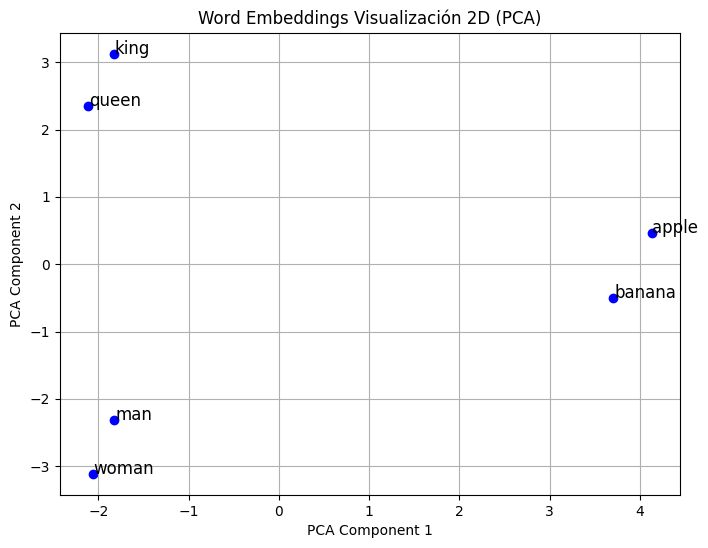

In [ ]:
# Graficar las palabras en el espacio 2D reducido
plt.figure(figsize=(8, 6))
for idx, word in enumerate(words):
    plt.scatter(word_vectors_2d[idx, 0], word_vectors_2d[idx, 1], marker='o', color='blue')
    plt.text(word_vectors_2d[idx, 0] + 0.01, word_vectors_2d[idx, 1], word, fontsize=12)

plt.title('Word Embeddings Visualización 2D (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

In [ ]:
# Ejemplo de similitud del coseno
similarities = []
word_pairs = [('king', 'queen'), ('man', 'woman'), ('apple', 'banana'), ('king', 'man')]

for word1, word2 in word_pairs:
    vec1 = model[word1]
    vec2 = model[word2]
    sim = cosine_similarity(vec1, vec2)
    similarities.append((word1, word2, sim))

In [ ]:
import pandas as pd

# Crear un dataframe con las similitudes del coseno
df_similarities = pd.DataFrame(similarities, columns=["Word 1", "Word 2", "Cosine Similarity"])
df_similarities

,Word 1,Word 2,Cosine Similarity
0,king,queen,0.750769
1,man,woman,0.832349
2,apple,banana,0.505447
3,king,man,0.511868
